# MRI NIH : Data exploration

## Imports

In [1]:
from msct_image import Image
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

## Paths

In [2]:
subject_dir = "/Users/frpau_local/Documents/nih/data/luisa_with_gt/"
tp_dirs = [tp_dir+"/" for tp_dir in os.listdir(subject_dir) if "tp" in tp_dir]

## Functions

In [3]:
def check_differences(liste, name):
    if liste.count(liste[0])==len(liste):
        print "All "+name+" are "
        print liste[0]
    else:
        print name+" : "
        print [(item, liste.count(item)) for item in set(liste)]

In [4]:
def plot_ranges(ranges, name):
    plt.plot(ranges["min"], label="min", color="b")
    plt.plot(ranges["max"], label="max", color="r")
    plt.plot(ranges["med"], label="median", color="g")
    plt.axes().set_yscale("log")
    plt.title(name+" ranges")
    plt.legend(loc="lower right")
    plt.xlabel("time point")
    plt.ylabel("mean intensity")
    plt.show()

In [5]:
def plot_sim(sims, name):
    plt.figure(figsize=(10,7))
    for sim in sims:
        plt.plot(sim)
        plt.xlabel("slice number")
        plt.ylabel("mean intensity")
        plt.title(name+" superior-to-inferior mean intensity")
    plt.show()

In [6]:
def count_labeled_slices(gt_dict, name):
    labeled_indexes = {}
    print name+" :"
    for type_gt in gt_dict.keys():
        labeled_indexes[type_gt] = {}
        print "  "+type_gt
        for tp, image in gt_dict[type_gt].iteritems():
            count = 0
            indexes = []
            for i in range(image.data.shape[2]):
                if np.max(image.data[::,::,i])>0:
                    count+=1
                    indexes.append(i)
            detail_slice_index = " "
            if count<image.data.shape[2]:
                detail_slice_index = " (on slices %s)" %indexes
            print "    tp %s : %d slices%s" %(tp, count, detail_slice_index)
            labeled_indexes[type_gt][tp]=indexes
    return labeled_indexes

In [7]:
def get_class_balance(gt_dict, gt_indexes, name):
    print name+" :"
    for type_gt in gt_dict:
        count = 0.
        for tp, image in gt_dict[type_gt].iteritems():
            count += np.count_nonzero(image.data)/float(len(gt_indexes[type_gt][tp])*image.data.shape[0]*image.data.shape[1])
        count = 100*count/float(len(gt_dict[type_gt]))
        print "  %s : %f%%" %(type_gt, count)

In [8]:
def plot_hist(image, gt, name):
    data = image*gt
    hist, ranges = np.histogram(data)
    plt.plot(ranges[:-1], hist)
    plt.title(name+" intensity histogram")
    plt.xlabel("intensity")
    plt.ylabel("number of pixels")
    plt.show()

## Load raw images

In [9]:
images_cerv = []
images_thor = []
images_lumb = []


for tp_dir in tp_dirs:
    for seg_dir in [seg_dir for seg_dir in os.listdir(subject_dir+tp_dir) if not "." in seg_dir]:
        if "cerv" in seg_dir:
            if os.path.isfile(subject_dir+tp_dir+seg_dir+"/t2s_cerv.nii.gz"):
                images_cerv.append(Image(subject_dir+tp_dir+seg_dir+"/t2s_cerv.nii.gz"))
        elif "lumb" in seg_dir:
            if os.path.isfile(subject_dir+tp_dir+seg_dir+"/t2s_lumb.nii.gz"):
                images_lumb.append(Image(subject_dir+tp_dir+seg_dir+"/t2s_lumb.nii.gz"))
        elif "thor" in seg_dir:
            if os.path.isfile(subject_dir+tp_dir+seg_dir+"/t2s_thor.nii.gz"):
                images_thor.append(Image(subject_dir+tp_dir+seg_dir+"/t2s_thor.nii.gz"))

/Users/frpau_local/sct_3.1.1/python/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load ground truths

In [23]:
gt_cerv = {}
gt_thor = {}
gt_lumb = {}

# sturcture of gt dict :
# {type: {tp_number: image}} e.g. gt_cerv = {"gm": {"8": image}}

for tp_dir in tp_dirs:
    for seg_dir in [seg_dir for seg_dir in os.listdir(subject_dir+tp_dir) if not "." in seg_dir]:
        for image in [image for image in os.listdir(subject_dir+tp_dir+seg_dir) if "manual_training" in image]:
            image_spec = image.split('_')
            if image_spec[1] == "cerv":
                if image_spec[2] in gt_cerv.keys():
                    gt_cerv[image_spec[2]][tp_dir[:-1].split('_')[-1]] = Image(subject_dir+tp_dir+seg_dir+"/"+image)
                else:
                    gt_cerv[image_spec[2]]={tp_dir[:-1].split('_')[-1]:Image(subject_dir+tp_dir+seg_dir+"/"+image)}
            if image_spec[1] == "thor":
                if image_spec[2] in gt_thor.keys():
                    gt_thor[image_spec[2]][tp_dir[:-1].split('_')[-1]] = Image(subject_dir+tp_dir+seg_dir+"/"+image)
                else:
                    gt_thor[image_spec[2]]={tp_dir[:-1].split('_')[-1]:Image(subject_dir+tp_dir+seg_dir+"/"+image)}
            if image_spec[1] == "lumb":
                if image_spec[2] in gt_lumb.keys():
                    gt_lumb[image_spec[2]][tp_dir[:-1].split('_')[-1]] = Image(subject_dir+tp_dir+seg_dir+"/"+image)
                else:
                    gt_lumb[image_spec[2]]={tp_dir[:-1].split('_')[-1]:Image(subject_dir+tp_dir+seg_dir+"/"+image)}

## Number of time points

In [24]:
print "cerv : %d time points" %len(images_cerv)
print "thor : %d time points" %len(images_thor)
print "lumb : %d time points" %len(images_lumb)

cerv : 10 time points
thor : 10 time points
lumb : 10 time points


## Resolutions

In [12]:
cerv_res = [ list(np.around(im.dim[4:7],2)) for im in images_cerv ]
check_differences(cerv_res, "cerv resolutions")

thor_res = [ list(np.around(im.dim[4:7],2)) for im in images_thor ]
check_differences(thor_res, "thor resolutions")

lumb_res = [ list(im.dim[4:7]) for im in images_lumb ]
check_differences(lumb_res, "lumb resolutions")

All cerv resolutions are 
[0.15, 0.15, 1.0]
All thor resolutions are 
[0.15, 0.15, 1.0]
All lumb resolutions are 
[0.15, 0.15, 1.0]


## Orientations

In [13]:
cerv_ori = [ im.orientation for im in images_cerv ]
check_differences(cerv_ori, "cerv orientation")

thor_ori = [ im.orientation for im in images_thor ]
check_differences(thor_ori, "thor orientation")

lumb_ori = [ im.orientation for im in images_lumb ]
check_differences(lumb_ori, "lumb orientation")

All cerv orientation are 
RAI
All thor orientation are 
RAI
All lumb orientation are 
RAI


## Matrix sizes

In [14]:
cerv_mat = [ im.dim[0:2] for im in images_cerv ]
check_differences(cerv_mat, "cerv matrix sizes")

thor_mat = [ im.dim[0:2] for im in images_thor ]
check_differences(thor_mat, "thor matrix sizes")

lumb_mat = [ im.dim[0:2] for im in images_lumb ]
check_differences(lumb_mat, "lumb matrix sizes")

All cerv matrix sizes are 
(232, 174)
All thor matrix sizes are 
(232, 174)
All lumb matrix sizes are 
(232, 174)


## Numbers of slices

In [15]:
cerv_sli = [ im.dim[2] for im in images_cerv ]
check_differences(cerv_sli, "cerv numbers of slices")

thor_sli = [ im.dim[2] for im in images_thor ]
check_differences(thor_sli, "thor numbers of slices")

lumb_sli = [ im.dim[2] for im in images_lumb ]
check_differences(lumb_sli, "lumb numbers of slices")

All cerv numbers of slices are 
20
thor numbers of slices : 
[(24, 1), (20, 8), (21, 1)]
lumb numbers of slices : 
[(24, 1), (25, 1), (27, 1), (20, 6), (23, 1)]


## Ranges

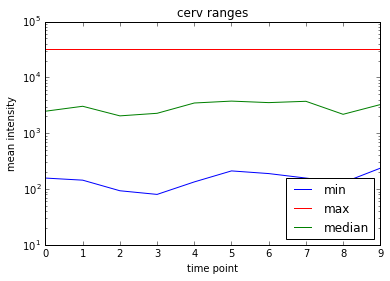

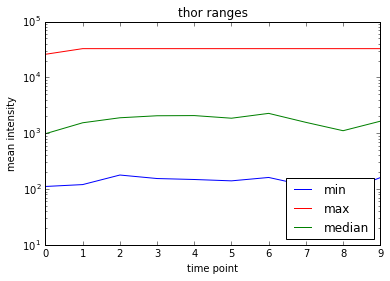

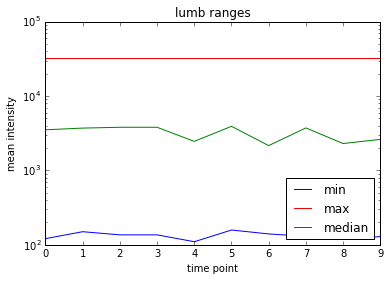

In [16]:
cerv_ran = {"min":[np.min(im.data) for im in images_cerv], "max":[np.max(im.data) for im in images_cerv], "med":[np.median(im.data) for im in images_cerv]}
plot_ranges(cerv_ran, "cerv")

thor_ran = {"min":[np.min(im.data) for im in images_thor], "max":[np.max(im.data) for im in images_thor], "med":[np.median(im.data) for im in images_thor]}
plot_ranges(thor_ran, "thor")

lumb_ran = {"min":[np.min(im.data) for im in images_lumb], "max":[np.max(im.data) for im in images_lumb], "med":[np.median(im.data) for im in images_lumb]}
plot_ranges(lumb_ran, "lumb")

## Superior-to-inferior mean intensity

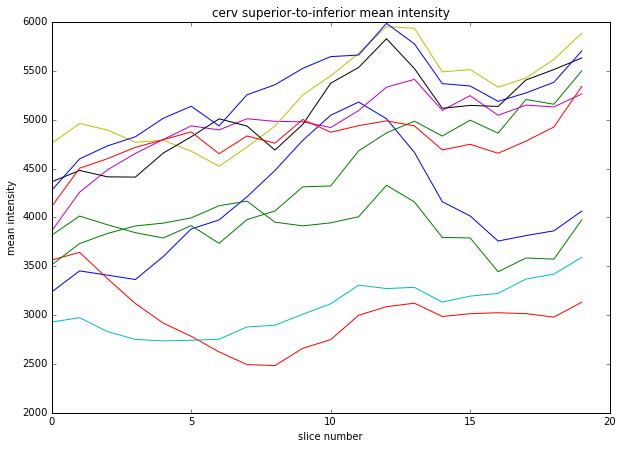

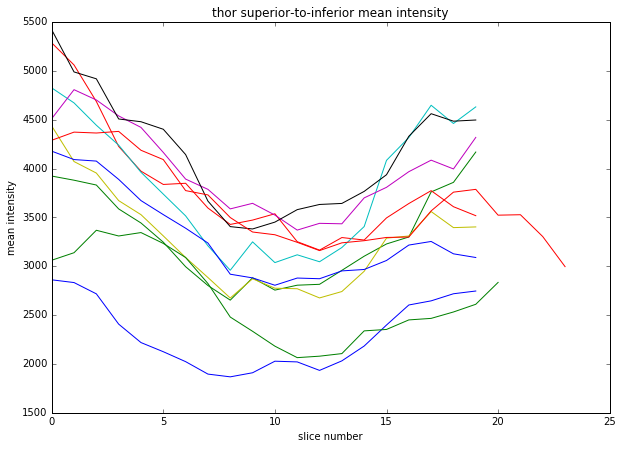

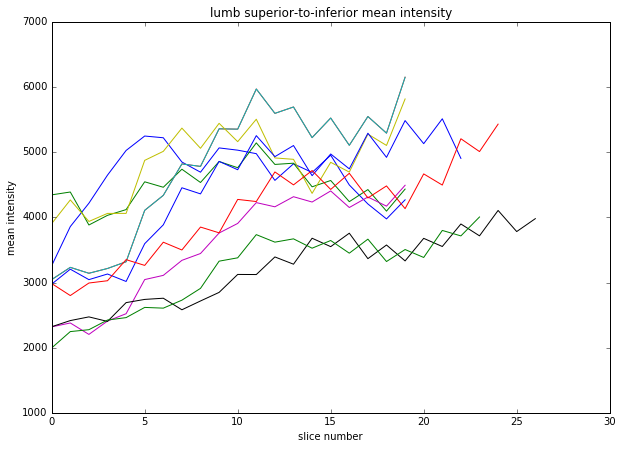

In [17]:
cerv_sim = [ np.mean(im.data, axis=(0,1)) for im in images_cerv ]
plot_sim(cerv_sim, "cerv")

thor_sim = [ np.mean(im.data, axis=(0,1)) for im in images_thor ]
plot_sim(thor_sim, "thor")

lumb_sim = [ np.mean(im.data, axis=(0,1)) for im in images_lumb ]
plot_sim(lumb_sim, "lumb")

## Labeled slices

In [18]:
gt_cerv_indexes = count_labeled_slices(gt_cerv, "cerv")
print " "
gt_thor_indexes = count_labeled_slices(gt_thor, "thor")
print " "
gt_lumb_indexes = count_labeled_slices(gt_lumb, "lumb")

cerv :
  gm
    tp 0 : 5 slices 
  csf
    tp 0 : 5 slices 
  focal
    tp 9 : 3 slices (on slices [7, 16, 17])
    tp 8 : 2 slices (on slices [7, 16])
    tp 7 : 1 slices (on slices [7])
  nawm
    tp 0 : 5 slices 
 
thor :
  gm
    tp 0 : 5 slices 
  csf
    tp 0 : 5 slices 
  focal
    tp 1 : 1 slices (on slices [15])
    tp 3 : 3 slices (on slices [14, 15, 16])
    tp 2 : 1 slices (on slices [15])
    tp 5 : 4 slices (on slices [14, 15, 16, 17])
    tp 4 : 3 slices (on slices [14, 15, 16])
    tp 7 : 6 slices (on slices [13, 14, 15, 16, 17, 19])
    tp 6 : 2 slices (on slices [14, 15])
    tp 9 : 9 slices (on slices [4, 12, 14, 15, 16, 17, 19, 20, 21])
    tp 8 : 5 slices (on slices [13, 14, 15, 16, 19])
  nawm
    tp 0 : 5 slices 
 
lumb :
  gm
    tp 1 : 5 slices 
  csf
    tp 1 : 5 slices 
  nawm
    tp 1 : 5 slices 


## Class balance

In [19]:
get_class_balance(gt_cerv, gt_cerv_indexes, "cerv")
print " "
get_class_balance(gt_thor, gt_thor_indexes, "thor")
print " "
get_class_balance(gt_lumb, gt_lumb_indexes, "lumb")

cerv :
  gm : 0.203627%
  csf : 0.403290%
  focal : 0.038259%
  nawm : 0.701546%
 
thor :
  gm : 0.085711%
  csf : 0.245739%
  focal : 0.159268%
  nawm : 0.482065%
 
lumb :
  gm : 0.259116%
  csf : 0.516250%
  nawm : 0.319560%


## Label orientations

In [25]:
print "cerv :"
for type_gt, item in gt_cerv.iteritems():
    print "  "+type_gt
    for tp, image in item.iteritems():
        print "    "+tp+" "+image.orientation
print " "
print "thor :"
for type_gt, item in gt_thor.iteritems():
    print "  "+type_gt
    for tp, image in item.iteritems():
        print "    "+tp+" "+image.orientation
print " "
print "lumb :"
for type_gt, item in gt_lumb.iteritems():
    print "  "+type_gt
    for tp, image in item.iteritems():
        print "    "+tp+" "+image.orientation

cerv :
  gm
    0 RAI
  csf
    0 RAI
  nawm
    0 LPI
 
thor :
  gm
    0 RAI
  csf
    0 RAI
  nawm
    0 RAI
 
lumb :
  gm
    1 RAI
  csf
    1 RAI
  nawm
    1 RAI


## Label matrix sizes

In [21]:
print "cerv :"
for type_gt, item in gt_cerv.iteritems():
    print "  "+type_gt
    for tp, image in item.iteritems():
        print image.data.shape
print " "
print "thor :"
for type_gt, item in gt_thor.iteritems():
    print "  "+type_gt
    for tp, image in item.iteritems():
        print image.data.shape
print " "
print "lumb :"
for type_gt, item in gt_lumb.iteritems():
    print "  "+type_gt
    for tp, image in item.iteritems():
        print image.data.shape

cerv :
  gm
(232, 174, 5)
  csf
(232, 174, 5)
  focal
(232, 174, 20)
(232, 174, 20)
(232, 174, 20)
  nawm
(232, 174, 5)
 
thor :
  gm
(232, 174, 5)
  csf
(232, 174, 5)
  focal
(232, 174, 20)
(232, 174, 20)
(232, 174, 20)
(232, 174, 20)
(232, 174, 20)
(232, 174, 20)
(232, 174, 20)
(232, 174, 24)
(232, 174, 21)
  nawm
(232, 174, 5)
 
lumb :
  gm
(232, 174, 5)
  csf
(232, 174, 5)
  nawm
(232, 174, 5)


## Label shapes

In [22]:
cerv_shapes = [ im.data.shape for im in images_cerv ]
check_differences(cerv_shapes, "cerv shapes")

thor_shapes = [ im.data.shape for im in images_thor ]
check_differences(thor_shapes, "thor shapes")

lumb_shapes = [ im.data.shape for im in images_lumb ]
check_differences(lumb_shapes, "lumb shapes")

All cerv shapes are 
(232, 174, 20)
thor shapes : 
[((232, 174, 20), 8), ((232, 174, 21), 1), ((232, 174, 24), 1)]
lumb shapes : 
[((232, 174, 23), 1), ((232, 174, 20), 6), ((232, 174, 27), 1), ((232, 174, 24), 1), ((232, 174, 25), 1)]
